测试sklearn随机森林。

# 基础使用

In [1]:
# 测试随机森林
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 加载数据集
iris = load_iris()
X = iris.data
y = iris.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建随机森林分类器
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
rf.fit(X_train, y_train)

# 评估模型
accuracy = rf.score(X_test, y_test)
print(f"模型准确率: {accuracy:.2f}")

模型准确率: 1.00


# 模型调参

In [ ]:
# 测试调参，先调节树的数量
from sklearn.model_selection import GridSearchCV
import numpy as np

# 定义参数网格
param_grid = {
    'n_estimators': np.arange(10, 201, 10)
}

# 创建网格搜索对象
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# 执行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数和最佳得分
print(f"最佳参数: {grid_search.best_params_}")
print(f"最佳得分: {grid_search.best_score_:.2f}")

# 最佳参数: {'n_estimators': 10}
# 最佳得分: 0.95

最佳参数: {'n_estimators': 10}
最佳得分: 0.95


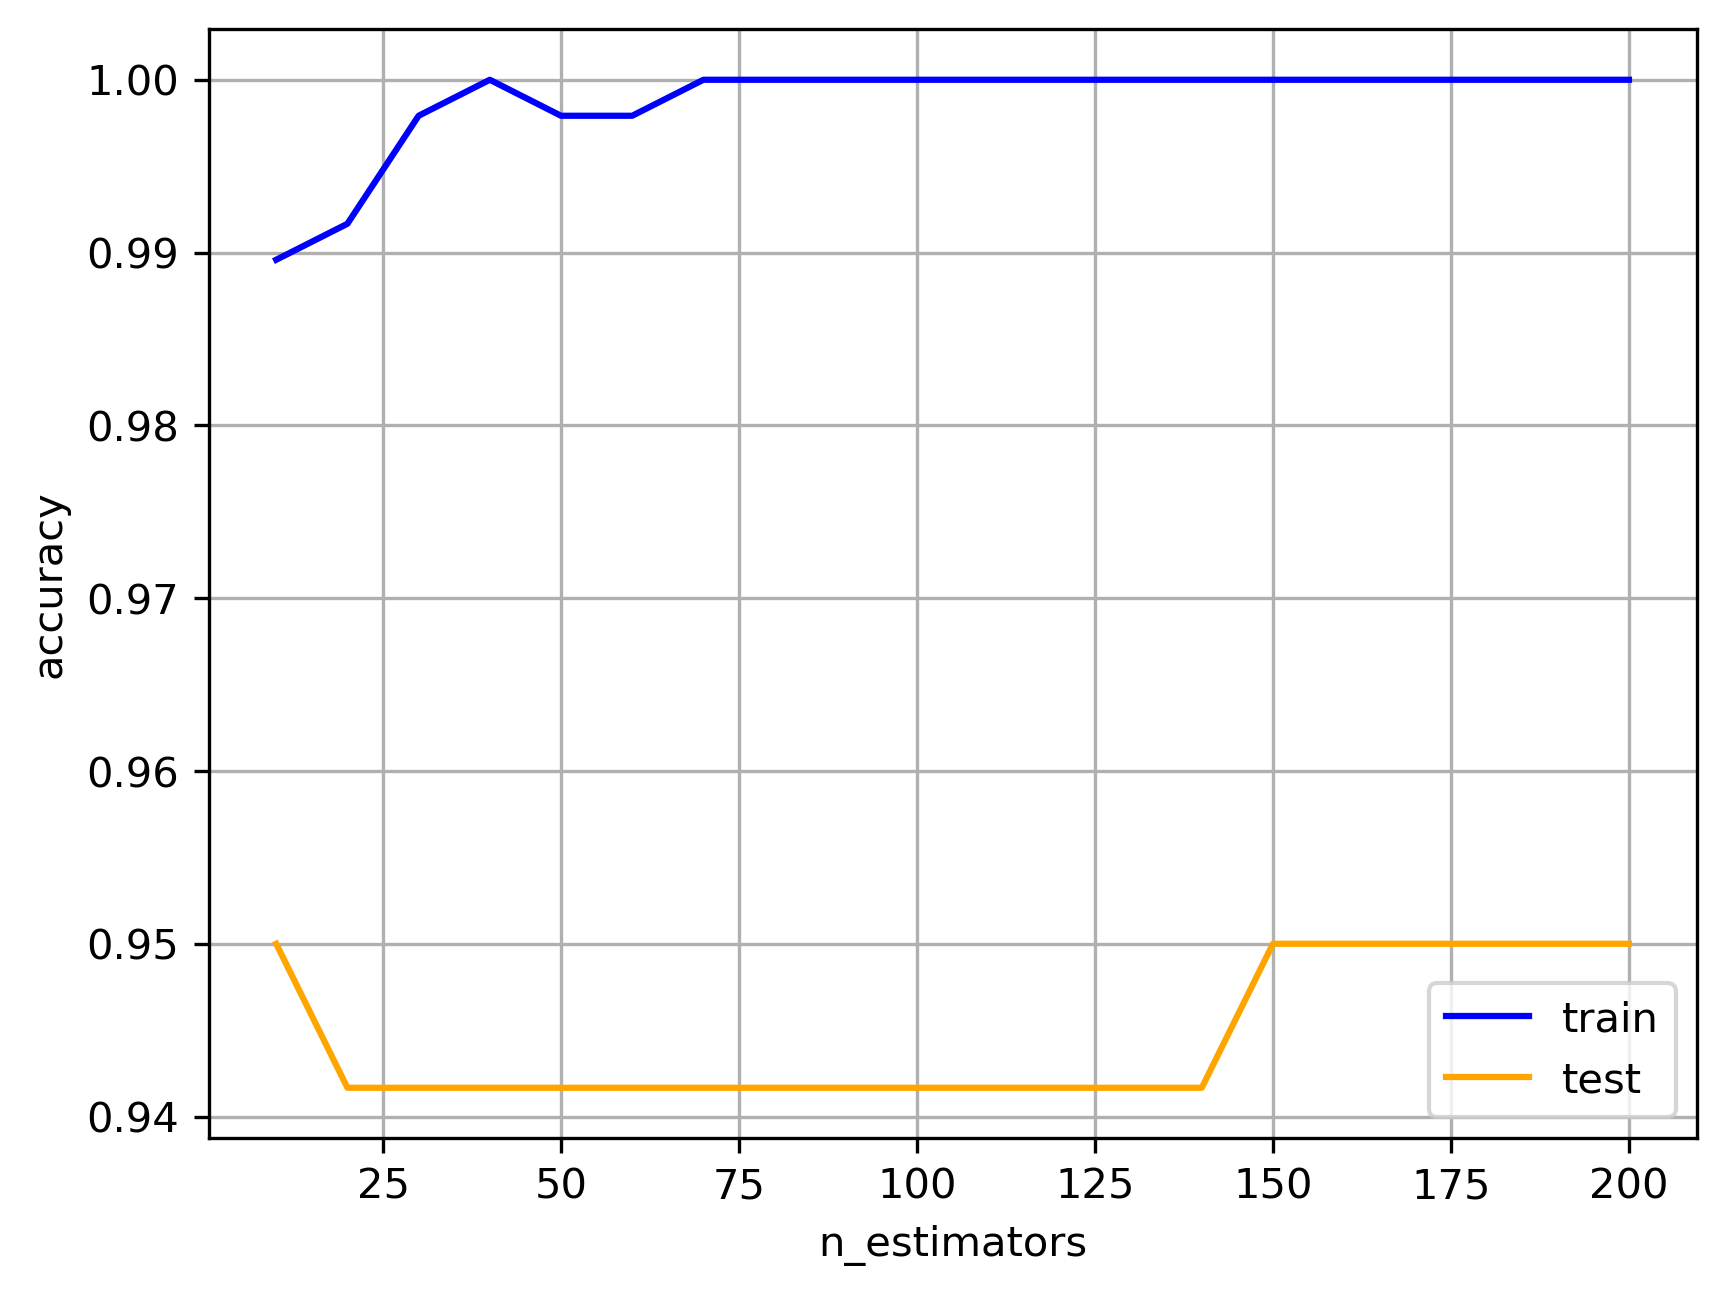

In [5]:
# 绘制验证曲线
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

# 定义参数范围
param_range = np.arange(10, 201, 10)

# 计算验证曲线
train_scores, test_scores = validation_curve(
    rf, X_train, y_train, param_name='n_estimators', param_range=param_range, cv=5, scoring='accuracy'
)

# 计算平均分数
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# 绘制验证曲线
plt.figure(dpi=300)
plt.plot(param_range, train_scores_mean, label='train', color='blue')
plt.plot(param_range, test_scores_mean, label='test', color='orange')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 测试调参，先调节树的数量
from sklearn.model_selection import GridSearchCV
import numpy as np

# 定义参数网格
param_grid = {
    'n_estimators': np.arange(2, 21, 1)
}

# 创建网格搜索对象
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# 执行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数和最佳得分
print(f"最佳参数: {grid_search.best_params_}")
print(f"最佳得分: {grid_search.best_score_:.2f}")

# 最佳参数: {'n_estimators': 14}
# 最佳得分: 0.96

最佳参数: {'n_estimators': 14}
最佳得分: 0.96


In [ ]:
# 14个树基础上调节树的深度
param_grid = {
    'max_depth': np.arange(1, 11, 1)
}

rf = RandomForestClassifier(n_estimators=14, random_state=42)

# 创建网格搜索对象
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# 执行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数和最佳得分
print(f"最佳参数: {grid_search.best_params_}")
print(f"最佳得分: {grid_search.best_score_:.2f}")

# 最佳参数: {'max_depth': 4}
# 最佳得分: 0.96

最佳参数: {'max_depth': 4}
最佳得分: 0.96
